## Data Dictionary
Customer details:

    CustomerID: Unique customer ID
    ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    Age: Age of customer
    TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
    Occupation: Occupation of customer
    Gender: Gender of customer
    NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    PreferredPropertyStar: Preferred hotel property rating by customer
    MaritalStatus: Marital status of customer
    NumberOfTrips: Average number of trips in a year by customer
    Passport: The customer has a passport or not (0: No, 1: Yes)
    OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    Designation: Designation of the customer in the current organization
    MonthlyIncome: Gross monthly income of the customer
    Customer interaction data:

    PitchSatisfactionScore: Sales pitch satisfaction score
    ProductPitched: Product pitched by the salesperson
    NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Problem
    To predict which customer is more likely to purchase the newly introduced travel package
    Which variables are most significant.
    Which segment of customers should be targeted more.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv(r"C:\Users\asdf\Documents\D.S\INEURON-PROJECTS\Tour_Package_Project\data\tour_package.csv")

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.shape

(4888, 20)

In [6]:
data=data.drop_duplicates()

In [7]:
data.shape

(4888, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


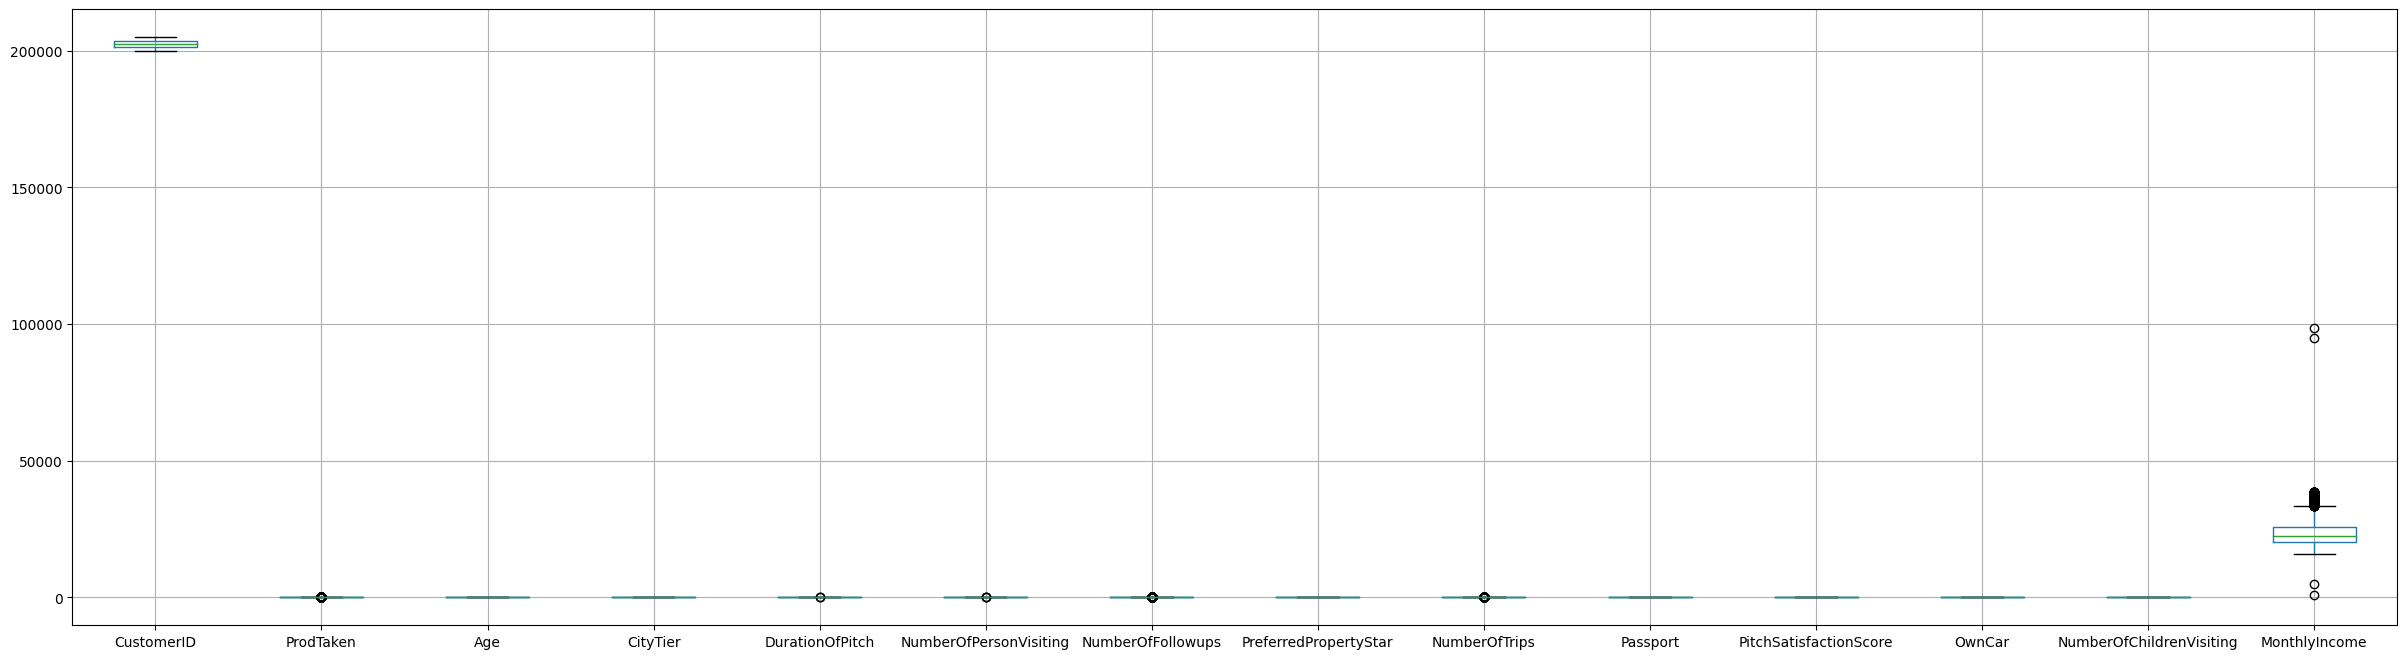

In [10]:
plt.figure(figsize=(30,8))
data.boxplot()
plt.show()

There is only some outliers in the MonthlyIncome data so we need to remove them first 

In [11]:
data["MonthlyIncome"].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [12]:
#let's Explore some data about the outliers first
data[data["MonthlyIncome"]>50000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


As after the find out these details we can clearly see these are outliers and we need to remove them

In [13]:
#we create a function for remove the outliers as there is no much outliers in the data but after that we also need to remove the outliers
def outlier_removal(data,column):
    mean=np.mean(data[column])
    std=np.std(data[column])
    cut_off=std*3
    upper_range,lower_range=mean+cut_off,mean-cut_off
    lower_range_index=list((data[data[column]<lower_range]).index)
    upper_range_index=list((data[data[column]>upper_range]).index)
    outlier_index=lower_range_index+upper_range_index
    data=data.drop(outlier_index,axis=0)
    return data
    

In [14]:
data=outlier_removal(data,"MonthlyIncome")

In [15]:
list(data[data["MonthlyIncome"]<7000].index)

[]

In [16]:
data.shape

(4884, 20)

<Axes: >

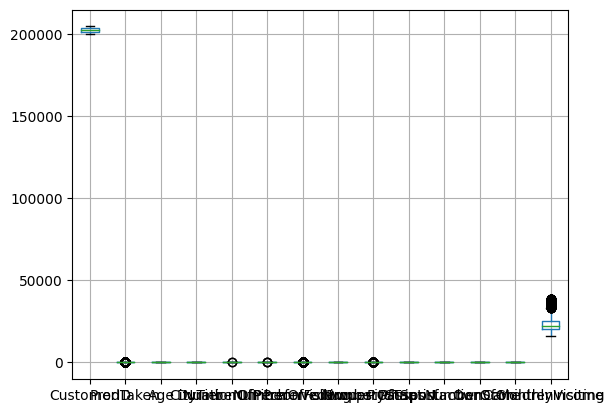

In [17]:
data.boxplot()

#### We will here do some eda manually after that we we handle all missing values and other things using pipeline

In [18]:
df=data.copy()

In [19]:
cat_features=data.select_dtypes(object).columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [20]:
num_features=data.select_dtypes([int,float]).columns
num_features.isnull().sum()
df=df.dropna()

In [21]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [22]:
n_f_df=df.select_dtypes([int,float]).columns
print(n_f_df)

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [23]:
df.shape

(4125, 20)

In [24]:
for i in n_f_df:
    df=outlier_removal(df,i)

In [25]:
df.shape

(4111, 20)

<Axes: >

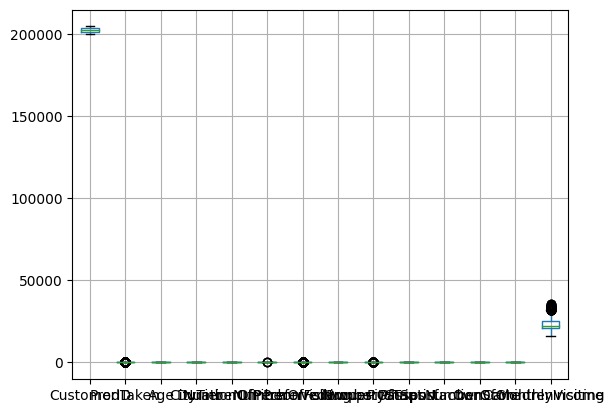

In [26]:
df.boxplot()

In [27]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,202526.258088,0.192897,37.204330,1.665045,15.556799,2.949161,3.739966,3.578935,3.277305,0.295305,3.059353,0.611287,1.223060,23138.988567
std,1409.689019,0.394621,9.164785,0.921198,8.226101,0.719620,1.007638,0.795078,1.778068,0.456235,1.362829,0.487517,0.853282,4276.991171
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16009.000000
25%,201318.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202601.000000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22412.000000
75%,203747.500000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25262.500000
max,204887.000000,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,35563.000000


## EDA

In [28]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [29]:
df.shape

(4111, 20)

##### ProdTaken is the Target variable

In [30]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [31]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [32]:
len(cat_features)

6

In [33]:
len(num_features)

14

In [34]:
for i in cat_features:
    print(f"Column Name: {i}")
    print(df[i].value_counts())
    print("<<"*30)
    print("<"*60)

Column Name: TypeofContact
TypeofContact
Self Enquiry       2906
Company Invited    1205
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Occupation
Occupation
Salaried          1991
Small Business    1743
Large Business     375
Free Lancer          2
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Gender
Gender
Male       2453
Female     1503
Fe Male     155
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: ProductPitched
ProductPitched
Basic           1611
Deluxe          1418
Standard         737
Super Deluxe     250
King              95
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [35]:
## here unmarried and single are same
## female and fe male are same so we need to handle them firsly

In [36]:
df["Gender"].value_counts()

Gender
Male       2453
Female     1503
Fe Male     155
Name: count, dtype: int64

In [37]:
df["Gender"]=np.where(df["Gender"]=="Fe Male","Female",df["Gender"])

In [38]:
df["Gender"].value_counts()

Gender
Male      2453
Female    1658
Name: count, dtype: int64

In [39]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

In [40]:
df["MaritalStatus"]=np.where(df["MaritalStatus"]=="Single","Unmarried",df["MaritalStatus"])

In [41]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      1986
Unmarried    1339
Divorced      786
Name: count, dtype: int64

In [42]:
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])


In [43]:
#visulization of each cat features

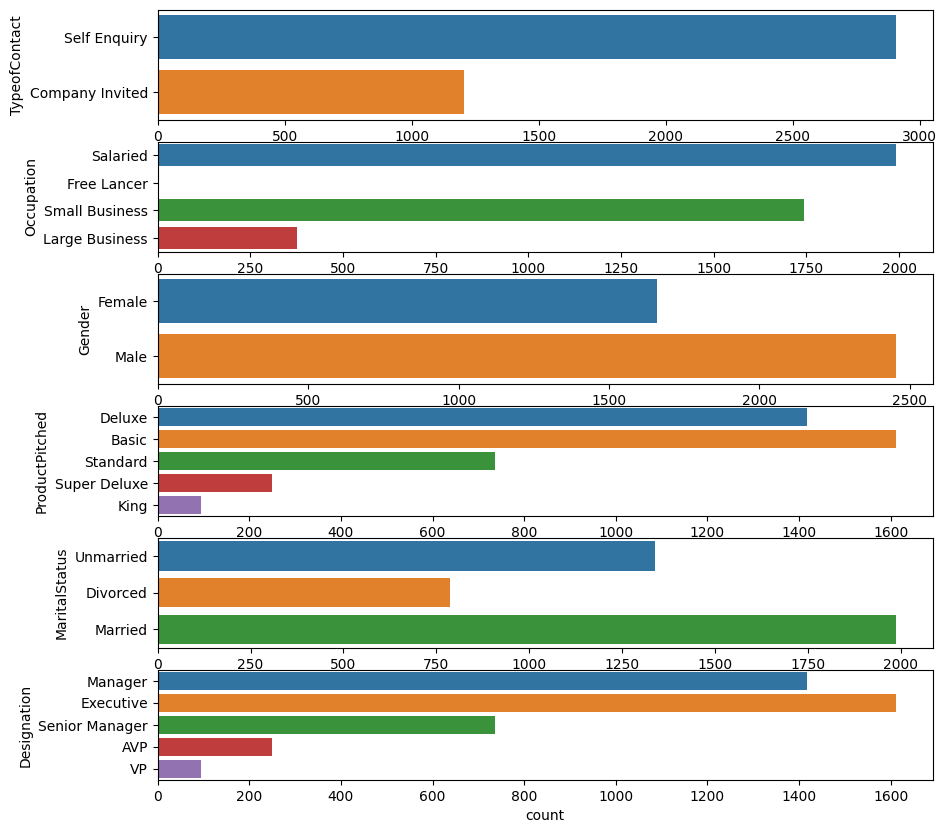

In [44]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i])

### Observation:
1. **Self Enquiry** is has been done by most of the customers
2. Most of the Customers are **Salaried and Small Bussiness**.
3. **Male** customer are **more** than **female** customers
4. From the Productpitched **Basic** has been taken most wheather **King** very less.
5. Most of the Customer are **Married**.
6. Destination of Most of the Customer is **Executive** and **Manager** and Less is **VP**.

In [45]:
for i in range(len(cat_features)):
    print(df.groupby(["ProdTaken",cat_features[i]]).size())
    print(">"*80)

ProdTaken  TypeofContact  
0          Company Invited     932
           Self Enquiry       2386
1          Company Invited     273
           Self Enquiry        520
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Occupation    
0          Large Business     268
           Salaried          1632
           Small Business    1418
1          Free Lancer          2
           Large Business     107
           Salaried           359
           Small Business     325
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Gender
0          Female    1361
           Male      1957
1          Female     297
           Male       496
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  ProductPitched
0          Basic             1128
           Deluxe            1253
           King                88
           Standard           618
   

### Let's See the Distribution with prodtaken

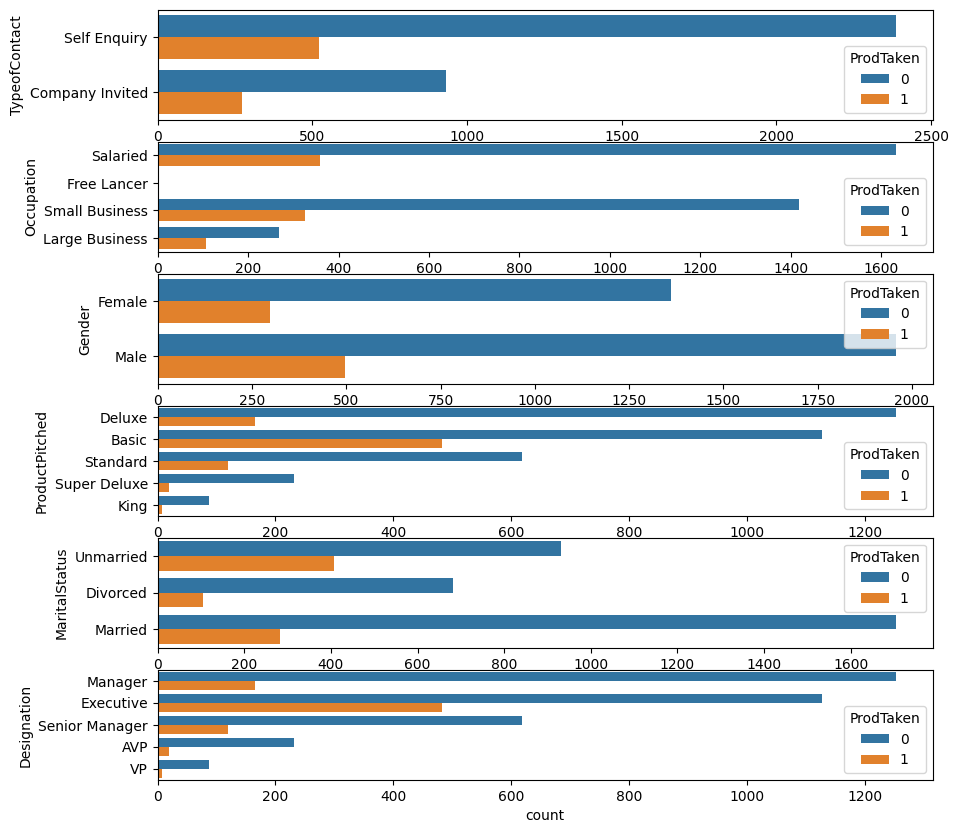

In [46]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i],hue=df["ProdTaken"])

### Observation:
1. **Basic product Pitch**  Purchase More packages compare with their count.
2.  **Unmarried**  Purchase More packages compare with their count.
3.  **Executive**  Purchase More packages compare with their count.
4. Rest of all are purchasing package in very normal according to their count.


##### Now we have done Data analysis  with categorical Features  Now need to do with Numeric Values...

In [47]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


####  Except from MonthlyIncome and Age all Feature are also categorical but in Int format so we can extract information in same way

In [48]:
for i in range(len(num_features)):
    print("Column Name:",num_features[i])
    print(df[num_features[i]].value_counts())
    print(">>"*30)
    print(">>"*30)

Column Name: CustomerID
CustomerID
200000    1
203470    1
203361    1
203363    1
203364    1
         ..
201751    1
201753    1
201755    1
201756    1
204887    1
Name: count, Length: 4111, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: ProdTaken
ProdTaken
0    3318
1     793
Name: count, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: Age
Age
36.0    215
35.0    214
30.0    187
31.0    187
34.0    187
33.0    178
32.0    177
37.0    176
38.0    170
29.0    164
39.0    143
41.0    135
28.0    135
27.0    125
40.0    123
42.0    116
43.0    106
46.0    104
45.0     96
26.0     91
44.0     89
50.0     74
47.0     63
25.0     63
51.0     60
49.0     57
48.0     55
52.0     54
55.0     52
53.0     51
54.0     51
24.0     46
23.0     46
22.0     42
59.0     40
21.0     39
20.0     36
56.0 

1. As Customer ID and MonthlyIncome has More variation so we can drop them.
2. Some features like Age and DurationOfPitch has more category, for the observation we can simply categorice  in some range

In [49]:
df.groupby("ProdTaken")["MonthlyIncome"].sum()

ProdTaken
0    77746588.0
1    17377794.0
Name: MonthlyIncome, dtype: float64

In [50]:
df=df.drop(["CustomerID","MonthlyIncome"],axis=1)

In [51]:
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager


In [52]:
num_features=df.select_dtypes([float,int]).columns
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

###### firstly handle the Age for Visulization

In [53]:
df["Age"].describe()

count    4111.000000
mean       37.204330
std         9.164785
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [54]:
df["Age"]=pd.cut(x=df["Age"],bins=[18,25,36,45,60,100],labels=["18-25","26-35","36-45","46-60","60+"])

In [55]:
df["Age"]

0       36-45
1       46-60
2       36-45
3       26-35
5       26-35
        ...  
4883    46-60
4884    26-35
4885    46-60
4886    18-25
4887    26-35
Name: Age, Length: 4111, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-60' < '60+']

<Axes: xlabel='count', ylabel='Age'>

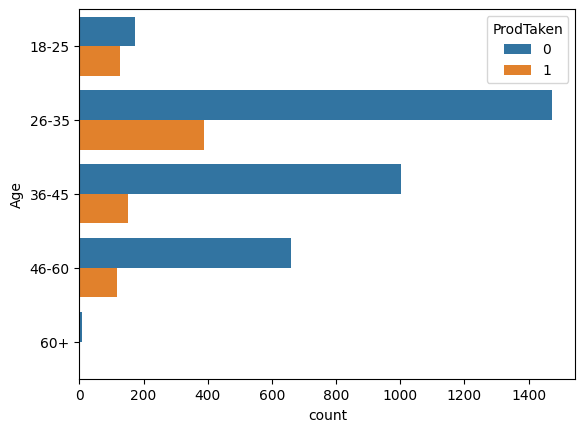

In [56]:
sns.countplot(y=df["Age"],hue=df["ProdTaken"])

Most of the customers b/w 26-35 age and these age group purchase the package most as well.
**Most Avrage** in purchasing the package is **18-25** age group they are purchasing more according to their count

In [57]:
df["DurationOfPitch"].value_counts()

DurationOfPitch
9.0     410
7.0     310
8.0     286
6.0     269
15.0    247
16.0    245
14.0    220
10.0    206
13.0    205
12.0    178
11.0    176
17.0    155
30.0     86
31.0     81
22.0     76
23.0     76
32.0     71
27.0     68
18.0     68
26.0     67
25.0     66
24.0     66
21.0     64
29.0     62
28.0     55
20.0     55
35.0     51
19.0     50
33.0     48
34.0     47
36.0     42
5.0       5
Name: count, dtype: int64

In [58]:
df["DurationOfPitch"].describe()

count    4111.000000
mean       15.556799
std         8.226101
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        36.000000
Name: DurationOfPitch, dtype: float64

In [59]:
df["DurationOfPitch"]=pd.cut(df["DurationOfPitch"],bins=[5,15,25,35],labels=["5-15","16-25","25-35"])

<Axes: xlabel='count', ylabel='DurationOfPitch'>

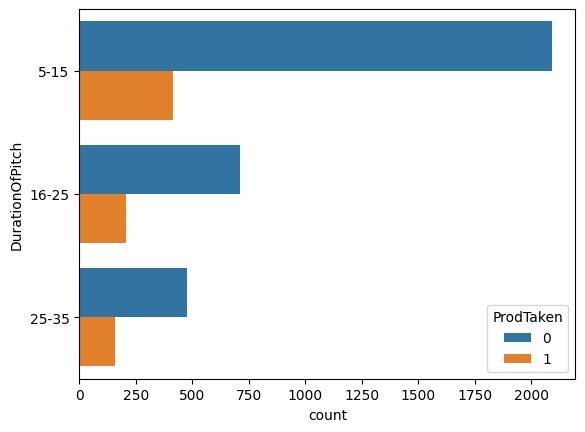

In [60]:
sns.countplot(y=df["DurationOfPitch"],hue=df["ProdTaken"])

1. Most Customer are from duration of 5-15 Duration of Pitch
2. Best rate of purchasing Package is from 25-35 Duration of Pitch

In [61]:
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [62]:
num_features=df.select_dtypes([float,int]).columns
print(len(num_features))
num_features


10


Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting'],
      dtype='object')

In [63]:
total=len(df["CityTier"])
print(total)
taken=len(df[df["ProdTaken"]==1]["CityTier"])
print(taken)
taken_rate=round((taken/total)*100,1)
print(f"{taken_rate}%")

4111
793
19.3%


In [64]:
total=len(df["CityTier"])
print(total)
not_taken=len(df[df["ProdTaken"]==0]["CityTier"])
print(not_taken)
not_taken_rate=round((not_taken/total)*100,1)
print(f"{taken_rate}%")

4111
3318
19.3%


In [65]:
for i in range(len(num_features)):
    print(f"Column Name: {num_features[i]}")
    print(df[num_features[i]].value_counts())
    taken_data=df[df["ProdTaken"]==1]
    total=len(taken_data)
    indexes=taken_data[num_features[i]].value_counts().index
    values=taken_data[num_features[i]].value_counts().values
    
    for j,k in zip(indexes,values):
        print(f" {j} is a  category of the {num_features[i]} with {k} values out of {total}, this is {round(k/total*100,0)}% rate of the Purchasing the Package.")

    print("<<"*30)
    print("<<"*30)
    

Column Name: ProdTaken
ProdTaken
0    3318
1     793
Name: count, dtype: int64
 1 is a  category of the ProdTaken with 793 values out of 793, this is 100.0% rate of the Purchasing the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: CityTier
CityTier
1    2663
3    1286
2     162
Name: count, dtype: int64
 1 is a  category of the CityTier with 439 values out of 793, this is 55.0% rate of the Purchasing the Package.
 3 is a  category of the CityTier with 311 values out of 793, this is 39.0% rate of the Purchasing the Package.
 2 is a  category of the CityTier with 43 values out of 793, this is 5.0% rate of the Purchasing the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: NumberOfPersonVisiting
NumberOfPersonVisiting
3    2065
2    1087
4     928
1      28
5       3
Name: count, dtype: int64
 3 is a

In [66]:
for i in range(len(num_features)):
    print(f"Column Name: {num_features[i]}")
    print(df[num_features[i]].value_counts())
    main_values=df[num_features[i]].value_counts().values
    taken_data=df[df["ProdTaken"]==1]
    total=len(taken_data)
    indexes=taken_data[num_features[i]].value_counts().index
    values=taken_data[num_features[i]].value_counts().values
    
    for j,k,m in zip(indexes,values,main_values):
        print(f""" <<{j}>> is a  category of the {num_features[i]} with {k} values which has been Purchae the package out of {total} and 
        Total values  {m}: this values is total number of category in whole data, this is {round(k/m*100,0)}% rate of the Purchasing
        the Package.""")

    print("<<"*30)
    print("<<"*30)
    

Column Name: ProdTaken
ProdTaken
0    3318
1     793
Name: count, dtype: int64
 <<1>> is a  category of the ProdTaken with 793 values which has been Purchae the package out of 793 and 
        Total values  3318: this values is total number of category in whole data, this is 24.0% rate of the Purchasing
        the Package.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: CityTier
CityTier
1    2663
3    1286
2     162
Name: count, dtype: int64
 <<1>> is a  category of the CityTier with 439 values which has been Purchae the package out of 793 and 
        Total values  2663: this values is total number of category in whole data, this is 16.0% rate of the Purchasing
        the Package.
 <<3>> is a  category of the CityTier with 311 values which has been Purchae the package out of 793 and 
        Total values  1286: this values is total number of category in whole data, this is 24.0% rate of the Purch

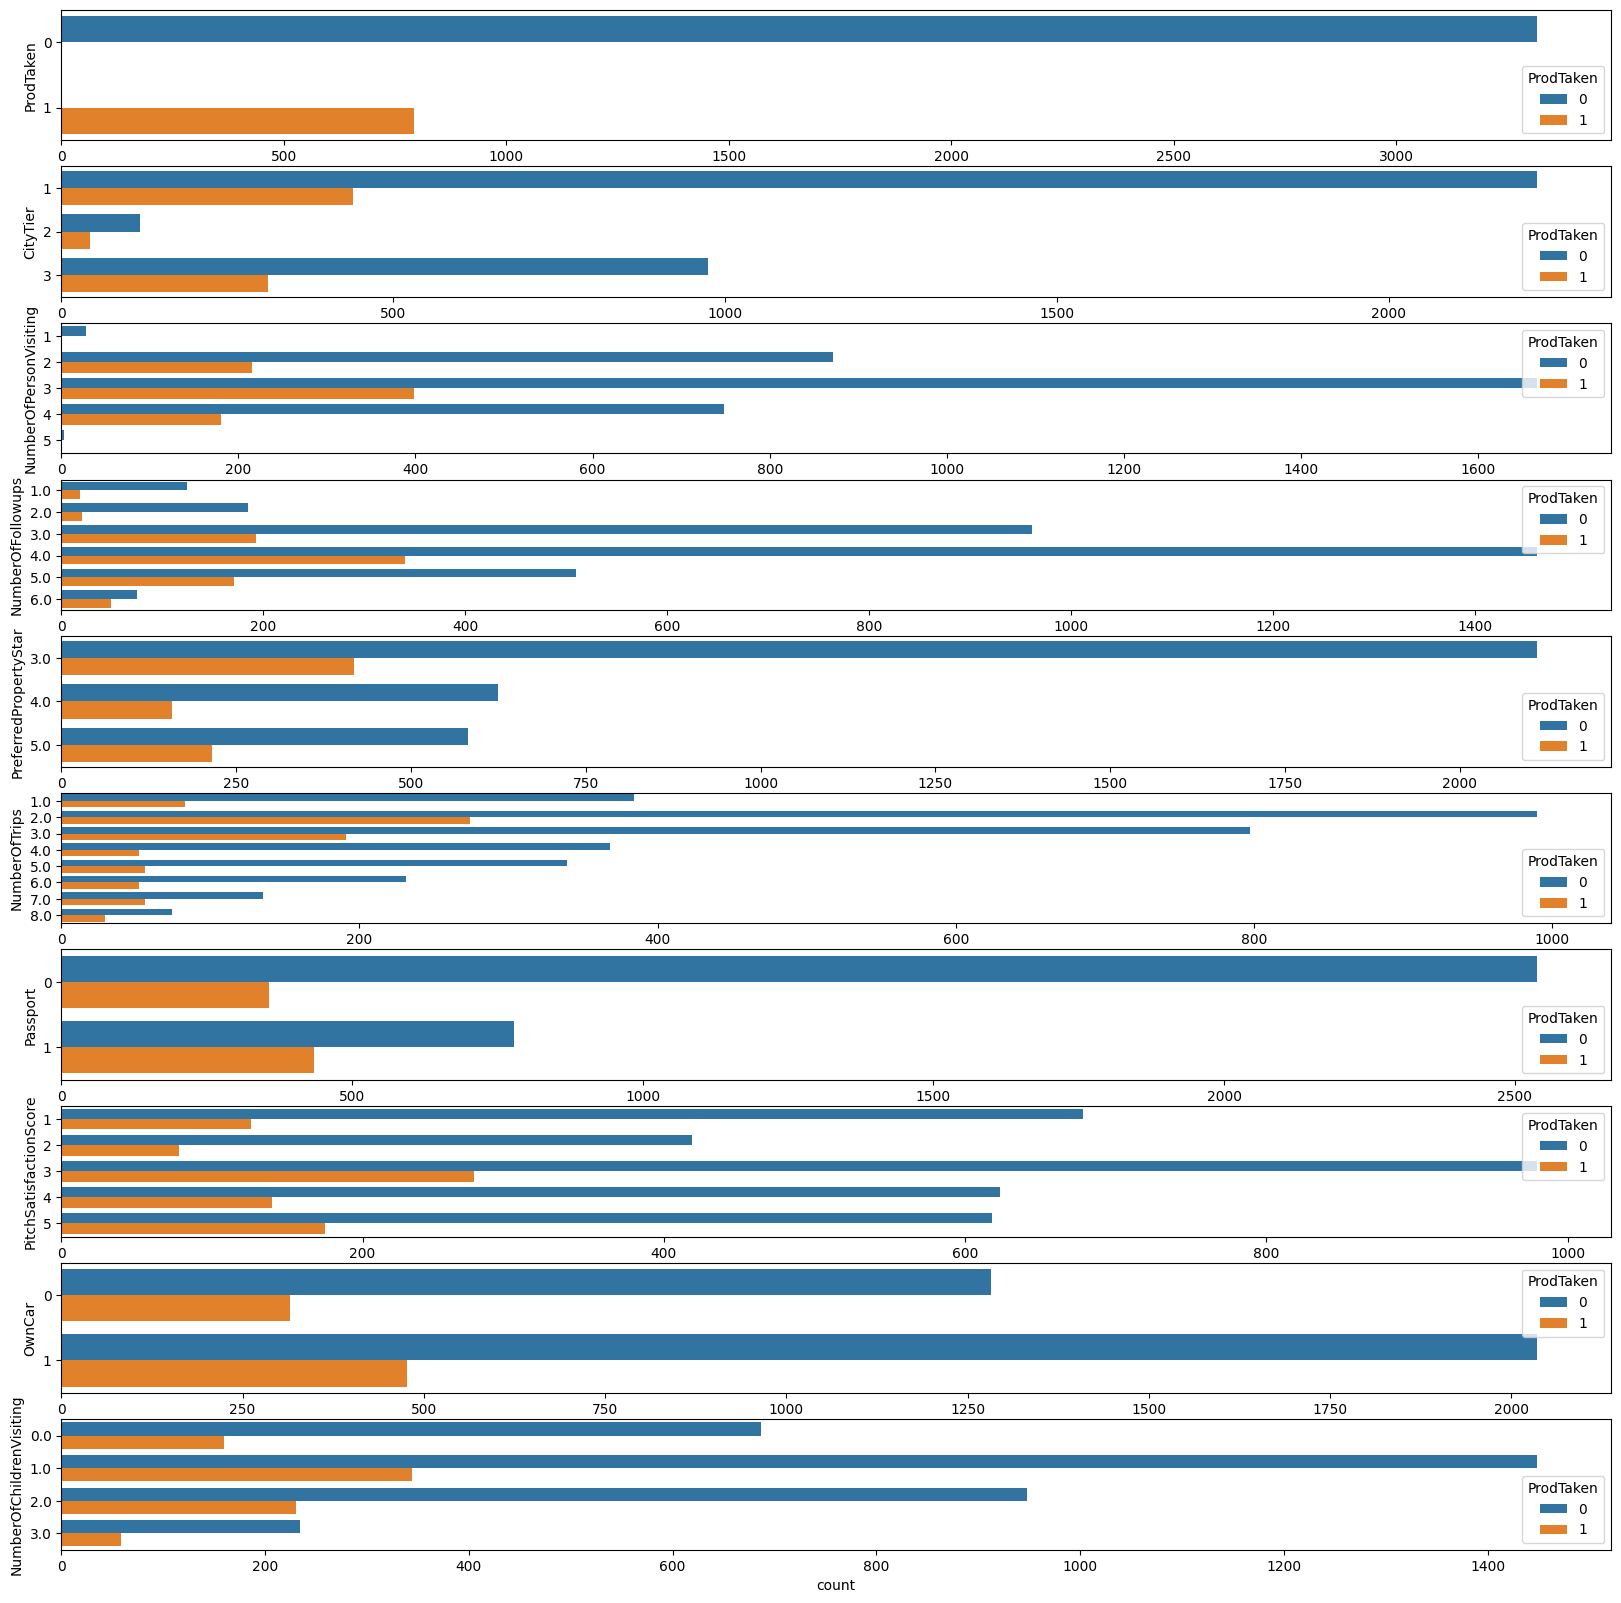

In [67]:
fig,ax=plt.subplots(10,figsize=(20,20))
for i in range(len(num_features)):
    sns.countplot(y=df[num_features[i]],ax=ax[i],hue=df["ProdTaken"])

## observation:
    

1. Most Customer from the **Tier 1 city** but the rate of the purchase the package is best from **Tier city 3**.
2. Most Number of Person is **3** who are planning to visit to the trip with the customer, But Best rate of purchasing the Package is Number of Person with **4**.
3. Most number is **4** :  Total number of follow-ups has been done by the salesperson after the sales pitch and best rate is with the **6**.
4. Most Customer are **preffered Property** with the **3 Star** and best rate at the **5 Star** **preferred Property.
5. The Customer are Most with who has **Number of trips** **2**
6. Most of Customer are those who has not Their Passport and best rate of puchasing the package are those customers who has **Passport**
7. Most of the Customer own the car and but best rate of the purchasing the package is those who did not own the car.
8. Most of the customer come with **1 child** but Best rate of purchasing package are with Number of children with **0 or 2**.


## Feature Selection

In [68]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [69]:
data1=data.dropna()
data1.shape

(4125, 20)

In [70]:
data1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


In [71]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [72]:
data1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


In [73]:
cat_features=data1.select_dtypes(object).columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [74]:
def dummies(data1,column_name_list):
    data1= pd.get_dummies(data1, columns=column_name_list)
    return data1

In [75]:
data1=dummies(data1,cat_features)

In [76]:
data1

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,False,False,False,False,True,False,False,True,False,False
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,False,False,True,False,False,False,False,True,False,False
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,False,False,False,False,True,False,True,False,False,False
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,False,False,True,False,False,False,True,False,False,False
5,200005,0,32.0,1,8.0,3,3.0,3.0,1.0,0,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,...,False,False,False,False,True,False,False,True,False,False
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,...,False,False,False,False,True,False,True,False,False,False
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,...,True,False,False,True,False,False,False,False,True,False
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,...,False,False,False,False,True,False,True,False,False,False


In [77]:
data1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

## Feature Selection

#### 1. Using the Heatplot on the basis of Correlation

<Axes: >

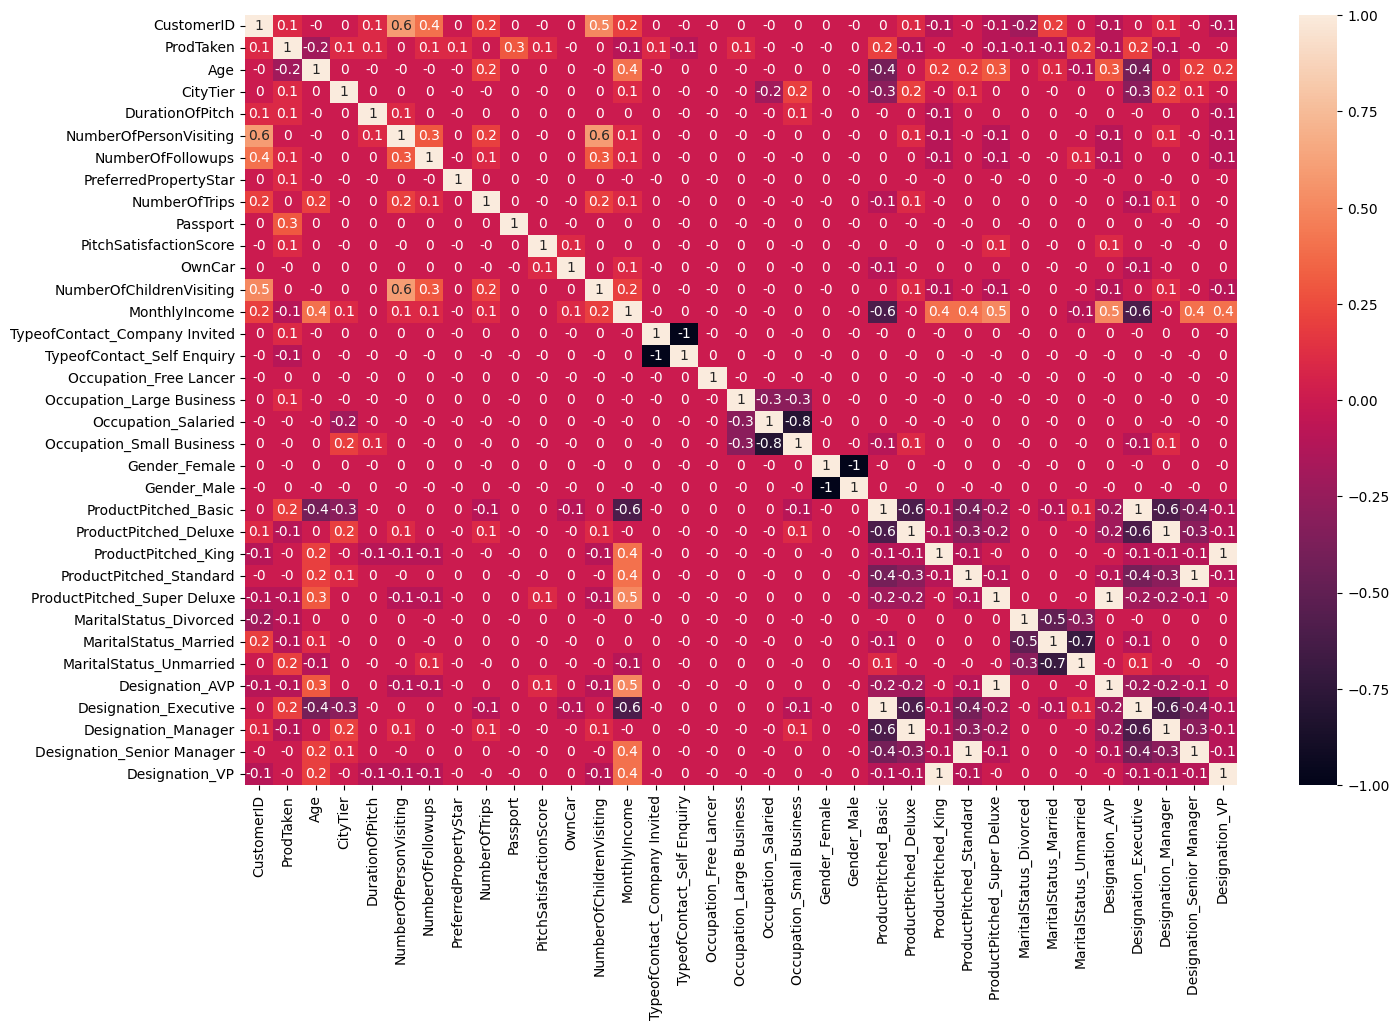

In [78]:
plt.figure(figsize=(16,10))
sns.heatmap(round(data1.corr(),1),annot=True)

### Observation:
1. Designation_Executive and ProductPitched_Basic are very highly correlated.
2. Designation_Manager and ProductPitched_Deluxe are very highly correlated.
3. Designation_VP and ProductPitched_King are highly correlated .
